In [47]:
import pandas as pd
from matplotlib import pyplot as plt

In [48]:
!ls

learning_experiment.ipynb  scaling_data_system2.csv	     system_info.ipynb
run_experiments.ipynb	   scaling_experiment.ipynb	     threads.pdf
scaling_analysis.ipynb	   scaling.pdf
scaling_data_system1.csv   single_experiment_analysis.ipynb


In [49]:
path = '/home/garg1/logs/pytorch_seed_rl/learning_experiment_final/csv/'
#path = 'pytorch_seed_rl/scaling_experiment/a_01_p_1_n_004/csv/'

In [50]:
eps_df = pd.read_csv(path + 'episodes.csv')

In [51]:
eps_df = eps_df.sort_values('episode_id')

In [52]:
# eps_df = eps_df[eps_df['episode_id']< 75000]

In [53]:
eps_df.tail()

,episode_id,return,length,training_steps
187,251.0,0.0,22,0.0
188,252.0,0.0,22,0.0
189,253.0,0.0,22,0.0
190,254.0,0.0,22,0.0
191,255.0,0.0,22,0.0


In [54]:
eps_df['count'] = eps_df.groupby(['training_steps'])['episode_id'].agg('count')

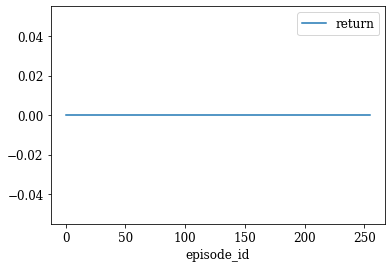

In [55]:
eps_df.plot(x='episode_id', y='return')

eps_df.plot(x='episode_id', y='length')

In [56]:
t_df = pd.read_csv(path + 'training.csv')

In [57]:
# t_df = t_df[t_df['training_steps'] < 5565760]

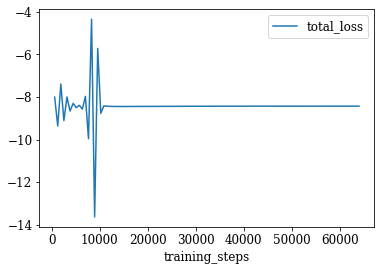

In [58]:
t_df.plot(x='training_steps', y='total_loss')

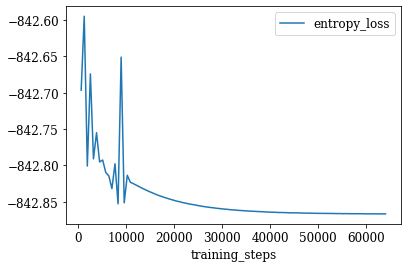

In [59]:
t_df.plot(x='training_steps', y='entropy_loss')

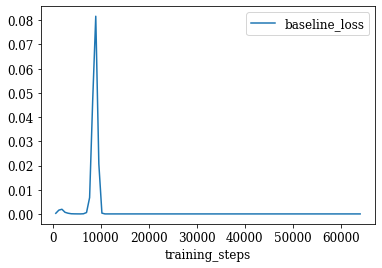

In [60]:
t_df.plot(x='training_steps', y='baseline_loss')

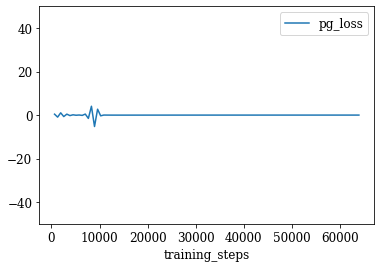

In [61]:
t_df.plot(x='training_steps', y='pg_loss', ylim=[-50, 50])

In [62]:
s_df = pd.read_csv(path + 'system.csv')
# s_df = pd.read_csv('pytorch_seed_rl/scaling_experiment/a_01_p_1_n_004/csv/system.csv')

In [63]:
s_df

,runtime,trajectories_seen,episodes_seen,mean_inference_latency,fetching_time,inference_time,inference_steps,training_time,training_steps,queue_batches,queue_drops,queue_rpcs,queue_storing
0,14.334027,0,0,0.000000,0.0,0.398322,5312,0.0,0,0,0,93,1024
1,16.537098,142,0,0.000000,0.0,0.411081,6080,0.0,640,3,0,128,1024
2,16.570909,147,0,0.000000,0.0,0.411081,6080,0.0,1280,2,0,128,1024
3,16.601412,151,0,0.000000,0.0,0.411081,6080,0.0,1920,1,0,128,1024
4,16.632440,155,0,0.000000,0.0,0.411081,6080,0.0,2560,0,0,128,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,83.541167,2944,256,0.246682,0.0,2.029461,62336,0.0,58880,0,0,128,1024
96,83.753533,2982,256,0.246682,0.0,2.031291,62464,0.0,59520,0,0,128,1024
97,83.875195,3008,256,0.246682,0.0,2.031291,62464,0.0,60160,0,0,128,1022
98,84.111955,3045,256,0.246682,0.0,2.034320,62592,0.0,60800,0,0,128,1024


In [64]:
s_df['t_fps'] = s_df['training_steps']/s_df['runtime']
s_df['i_fps'] = s_df['inference_steps']/s_df['runtime']

In [65]:
s_df.iloc[-1]['i_fps'], s_df.iloc[-1]['t_fps']

(744.388720765591, 729.1971142193544)

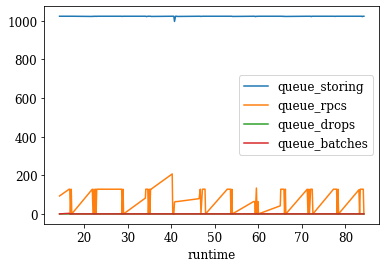

In [66]:
s_df[:1000].plot(x='runtime', y=['queue_storing', 'queue_rpcs', 'queue_drops','queue_batches'])

In [67]:
s_df[['queue_storing','queue_rpcs', 'queue_drops','queue_batches', 'mean_inference_latency']][-1000:].mean()

queue_storing             1023.510000
queue_rpcs                  86.310000
queue_drops                  0.010000
queue_batches                0.060000
mean_inference_latency       0.223483
dtype: float64

In [68]:
s_df = s_df.rename(columns={
    'runtime': 'Runtime [s]',
    'i_fps': 'Inference',
    't_fps': 'Training',
})

Text(0, 0.5, 'Frames per second')

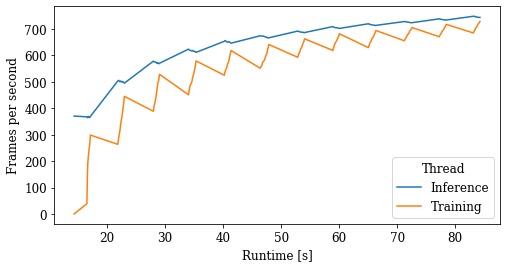

In [69]:
plt.rcParams.update({'font.size': 12,
                     'font.family': "serif"})
s_df.plot(x='Runtime [s]', y=['Inference', 'Training'], figsize=(8,4))
plt.legend(title='Thread')
plt.ylabel('Frames per second')
# plt.savefig('threads.pdf')